# Practical Basics of NLP by Dr. Candace Makeda Moore, MD

## The following a pre-written look at big data NLP basics, in the form of a notebook to do analysis of tweets. The principles here can be applied across numerous NLP datasets. Hidden in plain sight in this is a short text on NLP.

<div class="alert alert-danger">Must know critical concenpts are in red</div>

<div class="alert alert-warning"> <b>Some advanced commentary/note with practical implications</b>  </div>

<div class="alert alert-success"> <b>This notebook does not cover much esoteric material such as automata theory, or a deep explanation of languages. A few notes on theory are made only when very interesting or relevant. This is a practical notebook. In green are notes for beginners to programming. If you are a beginner to Jupyter, you should scroll through running EVERY SINGLE CELL. I put in a hyperlinked table of contents, but most notebooks build sequentially, so in order not to cause errors, just run every cell.</b>  </div>

<div class="alert alert-info"> <b>The few notes on esoteric academic theory are made in blue boxes. Swim in the sea of the inventions of the human mind's undderstanding of the world if you have time. You could be the subject of automata theory, intelligent one!</b>  </div>

The goals of this specific project includes examining a tweet dataset on Covid, the virus wrecking the world in 2020.
The file provided was Corona_NLP_test.csv from the Kaggle website. 
The project will first examine the data to make sure it is clean, then do some basic NLP processing. 

Contents:

- <a href='#the_destination0'>Step 0: Install and import libraries</a>
- <a href='#the_destination1'>Step 1: Loading data and preliminary quality checks</a>
- <a href='#the_destination2'>Step 2: Data Preprocessing </a>
- <a href='#the_destination3'>Step 3: Parameters of our NLP</a>
- <a href='#the_destination4'>Step 4: Explore NLP concepts</a>
- <a href='#the_destination5'>Step 5: Visualization tricks</a>
- <a href='#the_destination6'>Step 6: Deeper data exploration with regular expressions</a>
- <a href='#the_destination7'>Step 7: Thoughts on vectorization</a>
- <a href='#the_destination8'>Step 8: What texts?</a>
- <a href='#the_destination9'>Step 9: Final thougts</a>

<div class="alert alert-warning"> <b>At one point in the past Google had some NLP programs that tracked tweets to predict some infectious diseases spreading. This is a much explored subject with at least a decade of academic research. You can copy this link into a browser to see an earlier article: https://www.bmj.com/content/344/bmj.e2353 </b>  </div>

<a id='the_destination0'></a>
## Step 0. Install and import libraries 

I did not have every library installed in a place Jupyter could run them from. When I tried to run my code I realized I did not have plotly or wordcloud  so I will install them here:

In [284]:
!! pip install plotly

['Requirement already satisfied: plotly in c:\\programdata\\anaconda3\\lib\\site-packages (4.11.0)',
 'Requirement already satisfied: six in c:\\programdata\\anaconda3\\lib\\site-packages (from plotly) (1.12.0)',
 'Requirement already satisfied: retrying>=1.3.3 in c:\\programdata\\anaconda3\\lib\\site-packages (from plotly) (1.3.3)']

In [285]:
!!pip install wordcloud

['Requirement already satisfied: wordcloud in c:\\programdata\\anaconda3\\lib\\site-packages (1.8.0)',
 'Requirement already satisfied: pillow in c:\\programdata\\anaconda3\\lib\\site-packages (from wordcloud) (5.3.0)',
 'Requirement already satisfied: matplotlib in c:\\programdata\\anaconda3\\lib\\site-packages (from wordcloud) (3.0.2)',
 'Requirement already satisfied: numpy>=1.6.1 in c:\\programdata\\anaconda3\\lib\\site-packages (from wordcloud) (1.15.4)',
 'Requirement already satisfied: cycler>=0.10 in c:\\programdata\\anaconda3\\lib\\site-packages (from matplotlib->wordcloud) (0.10.0)',
 'Requirement already satisfied: kiwisolver>=1.0.1 in c:\\programdata\\anaconda3\\lib\\site-packages (from matplotlib->wordcloud) (1.0.1)',
 'Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\\programdata\\anaconda3\\lib\\site-packages (from matplotlib->wordcloud) (2.3.0)',
 'Requirement already satisfied: python-dateutil>=2.1 in c:\\programdata\\anaconda3\\lib\\site-p

<div class="alert alert-success"> <b>Your machine may not have the same libraries on it as my machine. Changes are if you lack programming skills, you have a machine with few things installed other than the operating system and programs. Generally speaking, you will then have to check what you have. I suggest you find a nerdy friend who writes command line, and loves infrastructure issues, and have them check. Command line is text that you usually write into a command line interface</b>  </div>

<div class="alert alert-success">If you find your code failing (producing errors), double down on what I wrote above.</div>

Next I load my basic data and NLP libraries/packages that I like:

In [326]:
# step to load up the right libraries
# although this can vary we will probably always use pandas, numpy, re, nltk and matplotlib 

#fundamental data analytics libraries and packages
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [327]:
# NLP libraries and packages
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
# we will need some specific functions from nltk to tokenize stuff.
from nltk.tokenize import sent_tokenize, word_tokenize 

In [328]:
#fancy visualization and other fancy libraries and packages
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

import datetime as dt
from IPython.display import Markdown, display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
#import seaborn as sns

In [329]:
#import advanced analytics and NLP packages
import scipy
from scipy import stats as st
#from sklearn.feature_extraction.text import CountVectorizer


<a id='the_destination1'></a>
## Step 1. Loading data and preliminary quality checks

Loading the data:

Note you can easily load other data in the same format, and I name the data with the generic sounding 'data_for_nlp'

In [330]:
data_for_nlp= pd.read_csv('Corona_NLP_test.csv')

Let' do the basic of understanding the data. First let's look at some rows so we see it:

In [331]:
def printmd(string):
    display(Markdown(string))
    
printmd('**Tweet info(original csv file)**')
data_for_nlp.head(5).style.set_properties(**{'background-color': 'pink',                                                   
                                    'color': 'blue',                       
                                    'border-color': 'white'})

**Tweet info(original csv file)**

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44955,nan,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event? https://t.co/IASiReGPC4 #QAnon #QAnon2018 #QAnon2020 #Election2020 #CDC https://t.co/29isZOewxu,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral


OK, so how long is this dataframe in rows? And what is in it in terms of data types? We will print it

In [332]:
data_for_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
UserName         3798 non-null int64
ScreenName       3798 non-null int64
Location         2964 non-null object
TweetAt          3798 non-null object
OriginalTweet    3798 non-null object
Sentiment        3798 non-null object
dtypes: int64(2), object(4)
memory usage: 178.1+ KB


In [333]:
print("This dataframe is", len(data_for_nlp), "rows long")

This dataframe is 3798 rows long


Maybe some of them are duplicate rows? 

In [334]:
# check for duplicates

print("Number of duplicated rows in the original data is",  data_for_nlp.UserName[data_for_nlp.duplicated()].sum(), ".")

Number of duplicated rows in the original data is 0 .


In [335]:
print("We have duplicated tweets in terms of user column:",data_for_nlp['UserName'].duplicated().any())
print("We have duplicated tweets in terms of time:",data_for_nlp['TweetAt'].duplicated().any())
print("We have duplicated tweets in terms of tweet content:", data_for_nlp['OriginalTweet'].duplicated().any())

We have duplicated tweets in terms of user column: False
We have duplicated tweets in terms of time: True
We have duplicated tweets in terms of tweet content: False


Interesting looks like Kaggle either has cleaned out people who tweeted twice in the time period, or more likely assigned different userids to every tweet, and already cleaned away people tweeting the same thing. Let's check for nulls:

In [336]:
#count up nulls
print("Null values in original data:",data_for_nlp.isnull().sum())

Null values in original data: UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


So we have a bunch of null values in Location.

In [337]:
#just for good measure
data_for_nlp.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


<a id='the_destination2'></a>
## Step 2: Data pre-processing



Time to transform the dataframe. We could rename the columns, but they are intuitive enough. What is not intuitive is the date. We should make it something numeric we can get a min, max and mean on. Therefore we can add a column with that. We will call it 'date_as_num'. Note we did not get hours or seconds, so our numbers will probably end with lots of zeroes.

In [338]:
data_for_nlp['date_as_num'] = pd.to_numeric(data_for_nlp['TweetAt'].astype('datetime64[ns]'))

def printmd(string):
    display(Markdown(string))
    
printmd('**Tweet info(transformed csv file)**')
data_for_nlp.head(5).style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'green',   
                                             'border-color': 'black'})

**Tweet info(transformed csv file)**

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,date_as_num
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative,1580688000000000000
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,1580688000000000000
2,3,44955,nan,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive,1580688000000000000
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event? https://t.co/IASiReGPC4 #QAnon #QAnon2018 #QAnon2020 #Election2020 #CDC https://t.co/29isZOewxu,Negative,1580688000000000000
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral,1583193600000000000


In [339]:
data_for_nlp.describe()

,UserName,ScreenName,date_as_num
count,3798.000000,3798.000000,3.798000e+03
mean,1899.500000,46851.500000,1.589510e+18
std,1096.532489,1096.532489,9.420526e+15
min,1.000000,44953.000000,1.580688e+18
25%,950.250000,45902.250000,1.584058e+18
50%,1899.500000,46851.500000,1.584230e+18
75%,2848.750000,47800.750000,1.585872e+18
max,3798.000000,48750.000000,1.606954e+18


Great we can see the max and min easily by sorting our vaues on date.

In [340]:
date_sorted = data_for_nlp.sort_values('date_as_num',ascending = False)
print(date_sorted.TweetAt.head(1))
print(date_sorted.TweetAt.tail(1))

594    12-03-2020
Name: TweetAt, dtype: object
0    02-03-2020
Name: TweetAt, dtype: object


In terms of data cleaning, it appears we have nothing to do here in the dates, as there are no dates from before or after Twitter exissted, or even before COVID.

<a id='the_destination3'></a>
## Step 3: Parameters of our NLP

### Key concept: stemming

<div class="alert alert-danger">Stemming is about  getting at the 'stem' of a word, which is to say (irony intended) it's root form. So if we have a group of words with the same root, they have the same stem. Stemming reduces words back to the stem.</div>

For more information on stemming try here: <a href= https://en.wikipedia.org/wiki/Stemming> https://en.wikipedia.org/wiki/Stemming</a>

We will assume all the tweets are in English. Probably a bad assumption, but this is a simplified notebook for basics.

In [341]:
english_stemmer = SnowballStemmer('english') 

Now let's see what SnowballStemmer does with some interesting terms...this will tell us something about the what we will get out of we use stemming.

In [342]:
words = ["COVID", "COVID19", "sanitizer", "sanitation","sanitary","Corona","Coronavirus","Corona virus"]

for word in words:
    print('Source word - {}, after stemming - {}'.format(word, english_stemmer.stem(word))) 
#for word in OriginalTweet

Source word - COVID, after stemming - covid
Source word - COVID19, after stemming - covid19
Source word - sanitizer, after stemming - sanit
Source word - sanitation, after stemming - sanit
Source word - sanitary, after stemming - sanitari
Source word - Corona, after stemming - corona
Source word - Coronavirus, after stemming - coronavirus
Source word - Corona virus, after stemming - corona virus


### Key concept: tokenization

<div class="alert alert-danger">Tokenization, a process we enable when we import the functions sent_tokenize, word_tokenize, is a process where we separate out things into small parts- tokens. We can tokenize sentences, words or even paragraphs. Tokenization with nltk is actually based on unsupervized machine learning. Nltk and a downloadable part of it called punkt "know" a lot about English already. We will see it can figure out that a sentence like "Mr. Evans is a big man." is one sentence, not two, and Mr. is a word...pretty crazy when you think about it. To learn more about nltk go to https://www.nltk.org/book/</div>

In [343]:
text = data_for_nlp.OriginalTweet[1]

words_in_tweet = nltk.word_tokenize(text)
print(words_in_tweet) 

['When', 'I', 'could', "n't", 'find', 'hand', 'sanitizer', 'at', 'Fred', 'Meyer', ',', 'I', 'turned', 'to', '#', 'Amazon', '.', 'But', '$', '114.97', 'for', 'a', '2', 'pack', 'of', 'Purell', '?', '?', '!', '!', 'Check', 'out', 'how', '#', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', '.', 'https', ':', '//t.co/ygbipBflMY']


Our tokenizer split the # off from words ('#nlp' becomes '#' , 'nlp'), and also breaks up urls (https://t.co/ygbipBflMY' becomes 'https', ':', '//t.co/ygbipBflMY')...good to know. 

More interesting stuff about tokenization:

In [344]:
# put in some sample text
new_text = """Dr. Evans is a radiologist. Her husband is a radiograher named Mr. Clarke. 
They both agree that the report for an imageshould be as follows:
Opacity in left upper lung field. No cardiomegaly. No pleural effusions. 
         Differential diagnosis of opacity invludes"""
print(sent_tokenize(new_text))

['Dr. Evans is a radiologist.', 'Her husband is a radiograher named Mr. Clarke.', 'They both agree that the report for an imageshould be as follows:\nOpacity in left upper lung field.', 'No cardiomegaly.', 'No pleural effusions.', 'Differential diagnosis of opacity invludes']


Wow. Nltk is doing much better than something a simple minded person might have coded. Can you see why? A simple minded person might declare everything with a period, question mark or exclamation point. We can model that with the re library:

In [345]:
#make a code from re library that states iif . or ?  or !then declare it a sentance.

re_sentences = re.split(r' *[\.\?!]', new_text)
print(re_sentences)

['Dr', ' Evans is a radiologist', ' Her husband is a radiograher named Mr', ' Clarke', ' \nThey both agree that the report for an imageshould be as follows:\nOpacity in left upper lung field', ' No cardiomegaly', ' No pleural effusions', ' \n         Differential diagnosis of opacity invludes']


Stupid program thinks Dr. is a sentence , haha, wait that isn't a stupid program, but a stupid programmer!


Well, the rule of the simple minded programmer/program was not enough to really parse the sentences. Such a rule makes mistakes, for example "Dr." is not a sentence.   We see here an example of an even more general point. Generally speaking, a rules based approach to long texts , and by long I mean even a few sentences, is often a losing one. We could make more rules. Like we could have a rule that if we have Mr. Ms. or Dr. then the period does not count. But the longer the text, the more rules we will have to make. An alternative approach to endless rules is to let the computer pick up the rules itself. Stay tuned for further notebooks that explore the abstract application of such an idea: machine learning.

### Key concept: lemmas and lemmization

<div class="alert alert-danger">A lemma is the basic form of a word. For a noun the simple singular. So for example cat and cats are both from the lemma cat. </div>

Now we can lemmatize the tokenized words:

In [347]:
nltk.download('wordnet')
wordnet_lemma = WordNetLemmatizer() 
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words_in_tweet]
print(lemmas) 

['When', 'I', 'could', "n't", 'find', 'hand', 'sanitizer', 'at', 'Fred', 'Meyer', ',', 'I', 'turned', 'to', '#', 'Amazon', '.', 'But', '$', '114.97', 'for', 'a', '2', 'pack', 'of', 'Purell', '?', '?', '!', '!', 'Check', 'out', 'how', '#', 'coronavirus', 'concern', 'are', 'driving', 'up', 'price', '.', 'http', ':', '//t.co/ygbipBflMY']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\makeda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id='the_destination4'></a>
## Step 4: Explore

### Key concepts: Counting and dictionaries

<div class="alert alert-danger"> Dictionaries are a kind of data structure. In this data structure we have a hasg table- a dictionary is a hash table. So what is a hash table? Something with keys and values that are matched. It also has some extra properties. The keys are unique for example.</div>

First an example on our example row

In [348]:
print(Counter(lemmas)) 

Counter({'I': 2, '#': 2, '.': 2, '?': 2, '!': 2, 'When': 1, 'could': 1, "n't": 1, 'find': 1, 'hand': 1, 'sanitizer': 1, 'at': 1, 'Fred': 1, 'Meyer': 1, ',': 1, 'turned': 1, 'to': 1, 'Amazon': 1, 'But': 1, '$': 1, '114.97': 1, 'for': 1, 'a': 1, '2': 1, 'pack': 1, 'of': 1, 'Purell': 1, 'Check': 1, 'out': 1, 'how': 1, 'coronavirus': 1, 'concern': 1, 'are': 1, 'driving': 1, 'up': 1, 'price': 1, 'http': 1, ':': 1, '//t.co/ygbipBflMY': 1})


And now let's do all rows and make it into a dictionary:

In [349]:
# word count will be an object created by calling constructor of class Counter
word_count = Counter()
for row in data_for_nlp[['OriginalTweet']].iterrows():
    tokenized = nltk.word_tokenize(row[1][0])
    word_count += Counter(tokenized)
#print(word_count)
word_count_dict = dict(word_count)
word_count_df = pd.DataFrame.from_dict({
    'words': list(word_count_dict.keys()), 
    'count': list(word_count_dict.values())
})
print(word_count_df)

                     words  count
0                 TRENDING      1
1                        :   2413
2                      New     24
3                  Yorkers      3
4                encounter      3
5                    empty    121
6              supermarket    463
7                  shelves    200
8                        (    276
9                 pictured      1
10                       ,   3528
11                 Wegmans      5
12                      in   1707
13                Brooklyn      5
14                       )    340
15                sold-out      2
16                  online    451
17                 grocers      6
18                FoodKick      1
19             MaxDelivery      1
20                      as    418
21                       #   7857
22     coronavirus-fearing      1
23                shoppers     36
24                   stock    679
25                      up    714
26                   https   1824
27       //t.co/Gr76pcrLWh      1
28       //t.c

Now we can see the most popular words:

In [350]:
words_by_number = word_count_df.sort_values('count', ascending = False)
print(words_by_number.head(30))

           words  count
21             #   7857
42             .   4896
122          the   3853
40            to   3671
10             ,   3528
52             ?   2597
1              :   2413
68           and   2348
50            of   2041
26         https   1824
47             a   1712
12            in   1707
110     Covid_19   1453
46           for   1284
144           is   1277
30             I   1251
147            @   1242
79          food   1200
57   coronavirus   1193
59           are   1091
78            on   1025
482        store    973
64           you    962
53             !    932
36            at    869
481      grocery    760
25            up    714
214       people    681
24         stock    679
166         have    674


### Key concept: stopwords

<div class="alert alert-danger"> Stopwords are words we decide  will filter out- like maybe "the". The idea is that these words contribute very little to understanding the meaning, and worse scew our statistics.</div>

So this brings up a point. We probabaly don't care about ! or ? or ,... we can use re to pull these out. We also may not care about stopwords. Stopwords are words we decide  will filter out- like maybe "the".

We can pull out punctuation with the re library- we are doing regular expressions kind of work. A regular expression (regex) is a rule for searching for substrings. Let's do a demo:

In [351]:
s= "string? or something ' with ! punctuation, commas. periods: and ; all'"
redo_s=re.sub(r'[^\w\s]','',s)
print(redo_s)

string or something  with  punctuation commas periods and  all


Now onto the real party: 

In [352]:
#tweet_text= data_for_nlp['OriginalTweet']
all_data_inside_row = ''
for data_inside_row in data_for_nlp[['OriginalTweet']].iterrows():
    redo_row = re.sub(r'[^\w\s]', '', data_inside_row[1][0])
    all_data_inside_row += redo_row
    

#word_count1 = Counter()

tokenized_new = nltk.word_tokenize(all_data_inside_row)
   

We already have a set of stopwords in one library library of stopwords called STOPWORDS - let's see what is inside:

In [353]:
print(STOPWORDS)

{"you've", 'www', 'get', 'was', 'own', 'your', 'from', 'some', 'shall', 'him', 'com', "where's", 'this', 'above', "didn't", 'are', 'if', 'about', 'not', 'because', 'or', 'his', "when's", 'few', 'in', 'myself', 'we', 'ourselves', 'other', 'here', 'however', 'who', 'both', "we'd", 'so', "they've", 'up', 'and', 'while', 'between', "he'll", 'how', 'a', "you'd", "they'll", 'else', 'below', 'those', 'yours', "how's", "won't", 'when', 'to', "shan't", 'am', 'should', "you'll", "weren't", 'i', 'too', "it's", 'theirs', 'such', 'himself', "i've", 'you', 'being', 'he', 'any', 'yourself', 'into', 'like', 'during', 'more', "doesn't", 'where', 'cannot', "that's", 'before', 'the', 'same', 'on', 'her', "what's", 'ever', 'for', 'it', 'by', 'its', 'me', 'having', 'then', "wasn't", 'r', 'were', 'itself', 'could', "there's", "she'll", 'what', 'all', 'their', 'most', 'which', 'had', 'has', 'once', 'been', 'at', 'down', "we've", 'that', 'she', "we'll", 'since', 'of', "i'd", 'our', 'each', 'further', 'just', 

Youch...those STOPWORDS will be useful for a wordclou, but some of those may be of interest depending on the context. We can make our own custom stopword list.

<a id='the_destination5'></a>
## Step 5: Explore through visualization

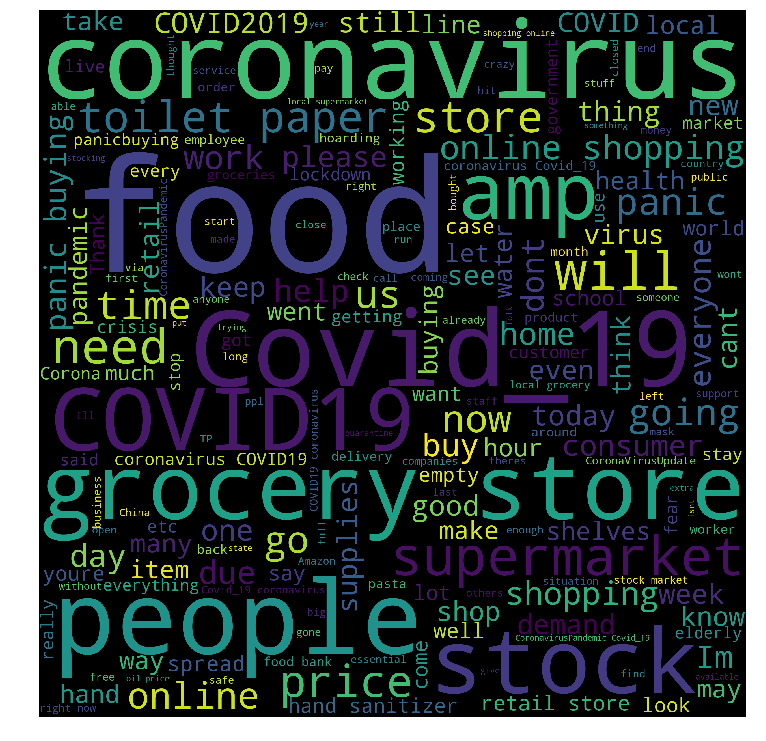

In [354]:


def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'black',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

showWordCloud(tokenized_new)    

Looks pretty but, very imprecise...Let's put all the text together, then count up words, the bar graph it in style.

In [355]:

def word_count(str):
    counts = dict()
    words_here = str.split()

    for word in words_here:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts
punct_free =  word_count(all_data_inside_row)
print( word_count(all_data_inside_row))

{'TRENDING': 1, 'New': 19, 'Yorkers': 3, 'encounter': 3, 'empty': 121, 'supermarket': 459, 'shelves': 200, 'pictured': 1, 'Wegmans': 3, 'in': 1701, 'Brooklyn': 5, 'soldout': 2, 'online': 441, 'grocers': 6, 'FoodKick': 1, 'MaxDelivery': 1, 'as': 417, 'coronavirusfearing': 1, 'shoppers': 36, 'stock': 677, 'up': 713, 'httpstcoGr76pcrLWh': 1, 'httpstcoivMKMsqdT1When': 1, 'I': 928, 'couldnt': 13, 'find': 54, 'hand': 123, 'sanitizer': 78, 'at': 866, 'Fred': 1, 'Meyer': 2, 'turned': 4, 'to': 3664, 'Amazon': 41, 'But': 57, '11497': 1, 'for': 1282, 'a': 1712, '2': 143, 'pack': 11, 'of': 2041, 'PurellCheck': 1, 'out': 484, 'how': 180, 'coronavirus': 962, 'concerns': 18, 'are': 1076, 'driving': 8, 'prices': 396, 'httpstcoygbipBflMYFind': 1, 'you': 908, 'can': 359, 'protect': 30, 'yourself': 18, 'and': 2347, 'loved': 5, 'ones': 23, 'from': 436, 'Panic': 37, 'buying': 274, 'hits': 5, 'NewYork': 4, 'City': 13, 'anxious': 7, 'on': 1021, 'foodampmedical': 1, 'supplies': 155, 'after': 92, 'healthcare':

We can isolate the top words by using head if we put the list in reverse ascending order by value of count.

In [356]:
word_count_dict_no_punct = dict(punct_free)
word_count_df_no_punct = pd.DataFrame.from_dict({
    'words': list(word_count_dict_no_punct.keys()), 
    'count': list(word_count_dict_no_punct.values())
})


sorted = word_count_df_no_punct.sort_values('count', ascending= False)
top_sorted= sorted.head(30)


In [357]:
layout = dict(
    title='Words on twitter about COVID',
    yaxis=dict(
        title='numbers',
        tickformat=',',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=top_sorted['words'],
    y=top_sorted['count']
))

iplot(fig)

<a id='the_destination6'></a>
## Step 6. Deeper data exploration and Regex

So we see the common words, but I bet some are misspelled or otherwise split into different counts when they should not be . Even in our graph we should ask ourselves should "Covid_19" and "COVID19" really be counted seperately? I bet the really mispellings all get a wordcount of one. More common mispellings may have a count that is higher. Let's be very unsophisticated, and just look at the tail of our data to see what kind of words come in once.  

In [358]:
print(sorted.tail(30))

                             words  count
8802                         liege      1
8803                     Difficult      1
8804                   expatriates      1
8805                     BelgiumPM      1
8778               Covid_19AWESOME      1
8776                  selfcheckout      1
8742                       APPROVE      1
8775                      guiltily      1
8743                       PAYROLL      1
8744                           TAX      1
8745                           CUT      1
8746                      December      1
8749                  differenceTo      1
8752                     wishesKid      1
8753                      imagined      1
8754                        Pacman      1
8757       httpstcoNDvXa7M8LCNEVER      1
8758                  mentalhealth      1
8759                        Dorset      1
8760               Easyfundraising      1
8761            httpstcokS1mqgfWC3      1
8762   httpstcoKwEgtbgV60Yesterday      1
8764                       Costcos

Some of these are misspellings like "handsanitisers" instead of "hand sanitizers" or "wipesliquid" instead of "wipes liquid." Luckily there is an easy way that if we want to find EVERY instance of "liquid" or "wipes" or"hand " we can. Regular expressions. We can even make it case insensitive. Let's find "wipes":

### First let's find all case where it says exactly wipes, look and count:

In [359]:
print([w for w in tokenized_new if w == 'wipes'])
print(sum(1 for w in tokenized_new if w == 'wipes'))

['wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes']
28


Case sensitivity may be overkill, let's look again at wipes or Wipes or WIPES

In [360]:
print([w for w in tokenized_new if w.lower() == 'wipes'])
print(sum(1 for w in tokenized_new if w.lower() == 'wipes'))

['wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'WIPES', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes']
32


We also could have looked using regular expressions, or Regex

### Key concept: Regex or regular expressions

<div class="alert alert-info"> The esoteric theory behind this idea:
Language (natural or programming) is something defined by a finite alphabet, and a set of rules to create words. 
The alphabet is symbols. We could have an alphabet of emojis, dinosaurs, chinese charecters, gestures (sign language)or latin charecters. Natural languages are our human languages e.g. Spanish, Chinese, Ukranian, English, American Sign Language. But there are other languages. DNA is a language by our definition, but we don't know if it's natural or not- many researchers believe so! But really,mostly, we think of human produced cultural languages including Pigdins and Creoles. In a pigdin with no writing system, sounds are the alphabet. 

Natural languages usually means any language spoken by humans but can be interepreted to be a context dependant language. 

The simplest languages there are are called regular languages. Simple here is meaning you can find a pattern to describe the entire language. Morse code if we think of it in terms of the letters it makes only (forget that those letters can spell words) is a regular language, English is not. 

Regular expressions- there is a pattern, this is the pattern that captures the language; built on three operations: juxtopposition, choice operator operation, and repitition. </div>
        

<div class="alert alert-danger">Getting practical: A regular expression (regex) is often used as a rule for searching for substrings (fragments of text within strings). 
Regular expressions can if you want create complex rules so that one expression returns several substrings. For instance, we could find every word in a list of words we make mentioned in our tweets. 
We will use the conveniently named library re here. </div>

We will start with a simple look at wipes:

In [361]:
print("Words that start with wipes appear in our dataset",sum(1 for w in tokenized_new if re.match('[wW]ipes', w)),"times.")

print([w for w in tokenized_new if re.match('[wW]ipes', w)])

Words that start with wipes appear in our dataset 34 times.
['wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipesliquid', 'wipes', 'wipes', 'wipes', 'wipes', 'wipesWe', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'WipescoronavirusTalked', 'wipes', 'wipes']


Interesting that we got two extras...'wipesliquid' and 'WipescoronavirusTalked.' What if we just wanted wipes when attached to another word on the left? What is we want it when starts the word and it continues (attached on right) or stops? What if we wanted to see all the case combinations of wipes. Time to start thinking about the re library.

In [362]:



print("Word on the left attached only:\n", re.findall('[A-z]+[wW]ipes', all_data_inside_row)) 
print("Word or word on the right attached:\n", re.findall('[wW]ipes[A-z]*', all_data_inside_row)) 

print("Words that match string of wipes exactly , case insensitive :\n", re.findall('[wW][iI][pP][eE][sS]', all_data_inside_row)) 

Word on the left attached only:
 ['cloroxwipes', 'sanitizerwipes']
Word or word on the right attached:
 ['wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipesliquid', 'wipes', 'wipes', 'wipes', 'wipes', 'wipesWe', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'WipescoronavirusTalked', 'wipes', 'wipes']
Words that match string of wipes exactly , case insensitive :
 ['wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'WIPES', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'wipes', 'wipes', 'wipes', 'Wipes', 'Wipes', 'wipes', 'wipes']


Not very exciting but we can print part of the tweets to give it context:

In [363]:
found_wipeq1_tweets = re.findall('[A-z ]*Wipes[A-z ]*',all_data_inside_row)
print("Whole tweets with word Wipes, case sensitive- starts with W :", len(found_wipeq1_tweets)  )
print( found_wipeq1_tweets  )

Whole tweets with word Wipes, case sensitive- starts with W : 4
[' AmyColeNews ShobnaGulatiTheres no need for PanicBuying weve got KWIKY Hand Sanitizer and Isopropyl Alcohol Wipes available on our Canadian retail store  httpstco', ' Reselling Lysol Wipes on Amazon at Inflated Prices SmartNews Covid_', 'Went to Costco Rona Walmart Dollar Tree Super Store Shoppers and Walmart All were out of Toilet Paper Lysol Wipes Paper Towel Tissue Chicken Pasta and canned food', 'Finally went to an Asian Store and was able to stock up on all items other than WipescoronavirusTalked to someone who is getting ready to launch an emergency essentials kit at market prices Hes got a source with couple of thousand items Hes going to donate the proceeds to food banks and to people who cant afford to subsist  COVID']


In [364]:
found_wipeq2_tweets = re.findall('[A-z ]*[wW][iI][pP][eE][sS][A-z ]*',all_data_inside_row)
print("Whole Tweets with word wipes, not case sensitive, even when melded to other words on the right:", len(found_wipeq2_tweets)  )
print( "Here are the tweets:\n",found_wipeq2_tweets  )

Whole Tweets with word wipes, not case sensitive, even when melded to other words on the right: 34
Here are the tweets:
 [' Order shopping online for delivery ALL  NEED BROADBAND remoteworking broadband ruralRetailers gouging consumer on Clorox spray wipes and sanitizers What use to be under ', 'Most of the Canadian r afraid and buying stock for the coming months Its hard to find Lysol wipes hand sanitizers hand soapsTrevor an RD at TCFD shares helpful tips when it comes to stocking up on food during a coronavirus quarantine Stock your pantry as you always do amp aim for your diet to consist of protein fat carbs fruits amp veggies httpstcocLaz', '  CoronavirusPandemicNO toiletpaper handsanitizer disinfectant wipes  at HomeDepot or Walmart Got some yesterday from the grocery store but cause ppl R going nuts amp stockpiling theres not enough ', 'gYrJqKCDE The Verge  via retailwire retail CoronaVirusUpdates Instacart DoorDash httpstcoPeqLQhaPDvLaurynnnG Yeah Ive seen eggs milk amp Lysol w

Lots of text...maybe we can just take it from wipes? We can. 

In [365]:
found_wipeq3_tweets = re.findall('[A-z ][wW][iI][pP][eE][sS][A-z ]*',all_data_inside_row)
print("Tweets with word wipes, even when melded to other words on the right:", len(found_wipeq3_tweets)  )
print( "Here are the partial tweets (starting at wipes):\n",found_wipeq3_tweets  )

Tweets with word wipes, even when melded to other words on the right: 33
Here are the partial tweets (starting at wipes):
 [' wipes and sanitizers What use to be under ', ' wipes hand sanitizers hand soapsTrevor an RD at TCFD shares helpful tips when it comes to stocking up on food during a coronavirus quarantine Stock your pantry as you always do amp aim for your diet to consist of protein fat carbs fruits amp veggies httpstcocLaz', ' wipes  at HomeDepot or Walmart Got some yesterday from the grocery store but cause ppl R going nuts amp stockpiling theres not enough ', ' wipes being sold out at grocery store due ', ' wipes ready for use after every transaction where a buyer hand signs on screen', ' wipes etc at extremely high prices should be boycotted after this is all over Disgraceful behaviour at a time like this Lots saying how entrepreneurial it is  What a load of BS Entrepreneurship is about helping also Covid_', ' wipes TP or hand sanitizer at your local grocery store Try your 

If you look carefully you will a discrepancy between found_wipeq2_tweets and found_wipeq3_tweets in number. The way found_wipeq3_tweets is written it doesn't take jus plain 'wipes'; but found_wipeq2_tweets does. The regex needs to be written exactly, exactly, like all code. 

<a id='the_destination7'></a>
## Step 7. Introducing  vectors

<div class="alert alert-warning">Sentiment analysis, topic modeling...usually this stuff requires in many cases if you don't want to write tons of code.</div>

<div class="alert alert-info">Truth be told sentiment analysis and topic modeling are just the begininng. These two things are popular in industry. On a deeper level once we have vectors we have texts as matrices. These matrices can be transformed in numerous ways to reveal insights or even be transformed in some kind of generative algorithm. Let the automata poetry begin!</div>

<div class="alert alert-danger">Vectors here are the mathematical objects as they are definted in computer science, not physics. Practically speaking they are usually denoted with something like:$\begin{pmatrix}0,1,4,5,6\end{pmatrix}$ (not those pointy Physics vectors $\overrightarrow{->}$)</div>

<div class="alert alert-warning">But it  might make it easier depending upon what llibraries you know.</div>

<div class="alert alert-success">Easier to code does not equal easier or more efficient for yuor computer to run. </div>

<div class="alert alert-warning">There are many methods you can use to vectorize. They include:

    · Binary term frequency
    
    ·  TFIDF ( term frequency–inverse document frequency)
      
    · Normalized term frequency
      

    · Bag of words

    · Word2Vec
    
  </div> 

<div class="alert alert-warning">Practicially speaking, many methods of making words to vectors rely on their frequency. Remember that above I made a lost of how ofen words were in our text? Those numbers can be used to assign numbers in a dictionary. </div>

<div class="alert alert-warning">Note if we want to ask if words are changing in frequency over  time, we don't technically need vectors...there are many questions we could already awnser without them.Our group of tweets is hardly an importaant corpora...I wonder if it is worth vectorizing. I'll save a deep exploration vectorizing for another notebook, but here I'll show some very basic notes.</div>

Let's make a dumb vector dictionary for a couple sentences- we will just sequentially assign numbers

In [375]:
#list of sentences to be vectorized
line="This is not technically the dumbest way to make a dictionary. I'm sure someone has done something worse. Then again, maybe not."
tokenized_line = nltk.word_tokenize(line)
#dictionary to hold the words
word_list={}
#initialize the counter for assigning to different word
counter=0
#iterate over the words
for word in tokenized_line:
 #check if the word is in dict
 if word not in word_list:
  word_list[word]=counter
  #update the counter
  counter+=1

print(word_list)

{'This': 0, 'is': 1, 'not': 2, 'technically': 3, 'the': 4, 'dumbest': 5, 'way': 6, 'to': 7, 'make': 8, 'a': 9, 'dictionary': 10, '.': 11, 'I': 12, "'m": 13, 'sure': 14, 'someone': 15, 'has': 16, 'done': 17, 'something': 18, 'worse': 19, 'Then': 20, 'again': 21, ',': 22, 'maybe': 23}


So we got, (drumroll)....:
$\begin{pmatrix}0,1,2,3,4,5,6,7,8,9,10,\end{pmatrix}$ $\begin{pmatrix}11,12,13,14,15,16,17,18,19,11\end{pmatrix}$ $\begin{pmatrix}20,21,22,23,2\end{pmatrix}$

<div class="alert alert-warning">The method we used to make vectors above are is not particularly useful. If we use frequency to create vectors, we can get much more information. For example in the TFIDF ( term frequency–inverse document frequency) method, we will pick up words that are frequent in some documents but not others and therefore might help us figure out what a particular document is about. </div>

 <div class="alert alert-warning">TFIDF can potentially be particularly useful when you have things like radiology reports or texts from electronic medical records. It assigns some weight to the word based on the number of occurrences in a particular document (term frequency) but also takes away weight if there is frequency of the word in a large number of the total documents (inverse document frequency). To make this concrete: a word like 'the' will appear in many documents, but a word like "Pick's" may appear mostly in the documents on neurology patients with some kind of dementia such that Pick's was at least in the differential. </div>

<div class="alert alert-info">Once we have vectors we can start asking questions about distances...distances between vectors we have made to understand the world of our text. In the future when we are all bored mathematicians (assuming robots do all the real work) perhaps people will each write books a about the meaning of distances in various contexts. Mathematical distances are a fascnating subject, and if we could solve all the questions there, we could probably solve many great human questions.  </div>

<a id='the_destination8'></a>
## Step 8. What texts?

<div class="alert alert-success">Here I used a pre-curated dataset. Life is rarely so easy.</div>

<div class="alert alert-warning">Here we used data in tweets. There are many ways to find digitzed data They include:

    · webscraping (Python's beautifullsoup library is good for this)

    · bespoke methods- write your own algorithm to get text from here to there

    · take analog stuff, scan and run an OCR(optical charecter recognition) algorithm
    
    
  </div> 

<div class="alert alert-success">In a practical sense, webscraping is a very useful skill that is not technically related to NLP, but in real world industry the two go hand in hand. Web scraping requires you to know just a bit about the internet. If you are just starting NLP, it's easier to find a curated dataset. There are a lot online. There are evenentire annotated corpora online!</div>

### Key concept: Corpus

<div class="alert alert-danger">One critical concept not covered here in this notebook was corpus.  A corpus (plural corpora) is a large and structured set of texts. A corpus can be monolingual, or multilingual.</div>

So there we have it- my beginner's intro to NLP which covered:
        
       ·  corpora (plural of corpus)
        · tokens and tokenization
       ·  lemmas and lematization
       ·  stems and stemming
       ·  vectors and vectorization

<a id='the_destination9'></a>
## Step 9. Final thoughts

My advanced notebook (a different one) will cover topics like sentiment analysis and topic modeling. 

<div class="alert alert-info">Natural language processing (NLP) is obviously and nearly tautologically the computerized processing of natural languages to obtain and organize information. But defining natural languages is tricky. While practically speaking, we mean human languages, interesting edge cases about what are considered natural languages include not only DNA but Python. Why Python (the language of this notebook)? It's not context free due to indentation. Think about it! </div>

<div class="alert alert-info">When we talk about languages in NLP, we are using a broad definition. Ie we did an analysis of the corpora of anthropology, it would probably reveal a different definition of languages. For example, a spoken pigdin is not really considered a full language by some social scientists. </div>

<div class="alert alert-info">Some of the most interesting uses of NLP are when it is applied to languages like DNA or RNA. There is very interesting NLP based reseach looking at what this language tells us about COVID19 and molecules it interacts with. Really we could find languages from the level of society all the way down to molecules, so NLP has many, many possible applications. </div>